In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [85]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [86]:
# File to Load (Remember to Change These)
municipio_pov_dataload = "Resources/municipalpoverty.csv"
municipio_df = pd.read_csv(municipio_pov_dataload)
povertyindicators_dataload = "Resources/Concentrado, indicadores de pobreza.csv"
povertyindicators_df = pd.read_csv(povertyindicators_dataload)




In [87]:
municipaldata = pd.DataFrame(municipio_df)
new = municipaldata[['clave_entidad', 'entidad_federativa', 'clave_municipio', 'municipio', 'poblacion', 'pobreza', 'pobreza_pob']].copy()
new.head()

,clave_entidad,entidad_federativa,clave_municipio,municipio,poblacion,pobreza,pobreza_pob
0,1,Aguascalientes,1001,Aguascalientes,"861,446",26.1,"224,949"
1,1,Aguascalientes,1002,Asientos,"46,624",54,"25,169"
2,1,Aguascalientes,1003,Calvillo,"52,773",56.8,"29,951"
3,1,Aguascalientes,1004,Cosío,"15,321",43.2,"6,620"
4,1,Aguascalientes,1005,Jesús María,"125,750",25,"31,479"


In [88]:
mexico_state_df = new[new['entidad_federativa'].str.contains("México")]
poverty_by_municipality_df = mexico_state_df.rename(columns={"clave_entidad": "State ID",
                                    "entidad_federativa": "State", 
                                    "clave_municipio": "Municipality ID",
                                    "municipio": "Municipality",
                                    "poblacion": "Population",
                                    "pobreza": "% Poverty", 
                                    "pobreza_pob": "Total Population in Poverty"})

poverty_by_municipality_df

,State ID,State,Municipality ID,Municipality,Population,% Poverty,Total Population in Poverty
656,15,México,15001,Acambay,"62,863",73.5,"46,233"
657,15,México,15002,Acolman,"171,774",56.2,"96,512"
658,15,México,15003,Aculco,"46,275",61.9,"28,628"
659,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,"10,354"
660,15,México,15005,Almoloya de Juárez,"179,746",59.9,"107,654"
...,...,...,...,...,...,...,...
776,15,México,15121,Cuautitlán Izcalli,"509,985",27.7,"141,173"
777,15,México,15122,Valle de Chalco Solidaridad,"452,170",59,"266,702"
778,15,México,15123,Luvianos,"24,639",84.9,"20,914"
779,15,México,15124,San José del Rincón,"84,040",76.3,"64,133"


In [89]:
povertyindicators_df



,Clave de entidad,Entidad federativa,Clave de municipio,Municipio,Población 2015*\n(leer nota al final del cuadro),Porcentaje de Pobreza\n2015,Personas Pobres\n2015,Carencias promedio de Pobreza\n2015,Porcentaje Pobreza Extrema\n2015,Personas Pobreza Extrema\n2015,...,Carencias promedio Población con al menos una carencia social\n2015,Porcentaje Población con tres o más carencias sociales\n2015,Personas Población con tres o más carencias sociales\n2015,Carencias promedio\n Población con tres o más carencias sociales 2015,Porcentaje Población con ingreso inferior a la línea de bienestar \n2015,Personas Población con ingreso inferior a la línea de bienestar\n2015,Carencias promedio Población con ingreso inferior a la línea de bienestar\n2015,Porcentaje Población con ingreso inferior a la línea de bienestar mínimo\n2015,Personas Población con ingreso inferior a la línea de bienestar mínimo\n2015,Carencias promedio Población con ingreso inferior a la línea de bienestar mínimo\n2015
0,15,México,15001,Acambay,"62,863",73.5,"46,233",2.4,19.8,"12,475",...,2.3,39.2,"24,627",3.4,75.0,"47,164",2.4,37.1,"23,336",2.6
1,15,México,15002,Acolman,"171,774",56.2,"96,512",2.0,8.6,"14,715",...,1.9,19.2,"32,987",3.3,67.9,"116,692",1.7,24.3,"41,814",2.0
2,15,México,15003,Aculco,"46,275",61.9,"28,628",2.2,10.7,"4,930",...,2.1,29.0,"13,408",3.4,63.6,"29,419",2.2,23.8,"10,993",2.4
3,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,"10,354",2.3,18.7,"2,638",...,2.2,34.4,"4,858",3.4,75.2,"10,616",2.2,37.5,"5,290",2.5
4,15,México,15005,Almoloya de Juárez,"179,746",59.9,"107,654",2.3,12.6,"22,666",...,2.2,28.9,"51,862",3.4,66.2,"118,999",2.1,25.3,"45,397",2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,15,México,15121,Cuautitlán Izcalli,"509,985",27.7,"141,173",1.9,2.8,"14,401",...,1.8,8.4,"43,048",3.3,43.0,"219,101",1.2,11.6,"59,110",1.6
121,15,México,15122,Valle de Chalco Solidaridad,"452,170",59.0,"266,702",2.1,9.5,"42,778",...,2.0,21.0,"94,843",3.3,71.2,"321,840",1.7,27.8,"125,851",2.0
122,15,México,15123,Luvianos,"24,639",84.9,"20,914",2.5,32.1,"7,911",...,2.4,44.7,"11,012",3.4,85.8,"21,145",2.5,54.4,"13,402",2.7
123,15,México,15124,San José del Rincón,"84,040",76.3,"64,133",2.6,22.8,"19,120",...,2.6,48.7,"40,958",3.4,76.4,"64,231",2.6,39.4,"33,153",2.7


In [90]:
povertyindicator = pd.DataFrame(povertyindicators_df)
new1 = povertyindicator[['Clave de municipio',
                         'Personas Rezago educativo\n2015', 
                         'Personas Carencia por acceso a los servicios de salud\n2015', 
                         'Personas Carencia por acceso a la seguridad social\n2015']].copy()

new2 = new1.rename(columns={"Clave de municipio": "Municipality ID",
                            "Personas Rezago educativo\n2015" : "People with education lag",
                            "Personas Carencia por acceso a los servicios de salud\n2015": "People without access to healthcare",
                            "Personas Carencia por acceso a la seguridad social\n2015": "People without social security"})
new2.head()

,Municipality ID,People with education lag,People without access to healthcare,People without social security
0,15001,"15,721","8,177","55,302"
1,15002,"19,176","34,621","107,655"
2,15003,"11,349","4,088","39,700"
3,15004,"3,811",986,"12,235"
4,15005,"39,433","22,250","132,743"


In [91]:
mergepoverty = pd.merge(poverty_by_municipality_df, new2, on="Municipality ID", how="right")

mergepoverty['Total Population in Poverty'] = mergepoverty['Total Population in Poverty'].str.replace(',', '')
mergepoverty['People with education lag'] = mergepoverty['People with education lag'].str.replace(',', '')
mergepoverty['People without access to healthcare'] = mergepoverty['People without access to healthcare'].str.replace(',', '')
mergepoverty['People without social security'] = mergepoverty['People without social security'].str.replace(',', '')

mergepoverty.head()

,State ID,State,Municipality ID,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security
0,15,México,15001,Acambay,"62,863",73.5,46233,15721,8177,55302
1,15,México,15002,Acolman,"171,774",56.2,96512,19176,34621,107655
2,15,México,15003,Aculco,"46,275",61.9,28628,11349,4088,39700
3,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,10354,3811,986,12235
4,15,México,15005,Almoloya de Juárez,"179,746",59.9,107654,39433,22250,132743


In [92]:
mergepoverty['Total Population in Poverty'] = mergepoverty['Total Population in Poverty'].astype(float)
mergepoverty['People with education lag'] = mergepoverty['People with education lag'].astype(float)
mergepoverty['People without access to healthcare'] = mergepoverty['People without access to healthcare'].astype(float)
mergepoverty['People without social security'] = mergepoverty['People without social security'].astype(float)

mergepoverty.head()

,State ID,State,Municipality ID,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security
0,15,México,15001,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0
1,15,México,15002,Acolman,"171,774",56.2,96512.0,19176.0,34621.0,107655.0
2,15,México,15003,Aculco,"46,275",61.9,28628.0,11349.0,4088.0,39700.0
3,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,10354.0,3811.0,986.0,12235.0
4,15,México,15005,Almoloya de Juárez,"179,746",59.9,107654.0,39433.0,22250.0,132743.0


In [93]:
mergepoverty.dtypes

State ID                                 int64
State                                   object
Municipality ID                          int64
Municipality                            object
Population                              object
% Poverty                               object
Total Population in Poverty            float64
People with education lag              float64
People without access to healthcare    float64
People without social security         float64
dtype: object

In [94]:
#Now we are going to do plots and linear regressions testing the indicators of poverty,
#the last three columns, with the total population poverty per municipality.

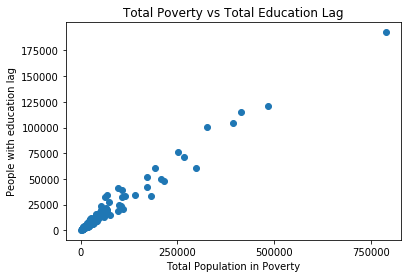

In [100]:
plt.scatter(mergepoverty['Total Population in Poverty'],mergepoverty['People with education lag'])
plt.xlabel("Total Population in Poverty")
plt.ylabel("People with education lag")
plt.title ("Total Poverty vs Total Education Lag")
plt.xticks(np.arange(0, 800000, step = 250000))
plt.yticks(np.arange(0, 200000, step = 25000))
plt.show()

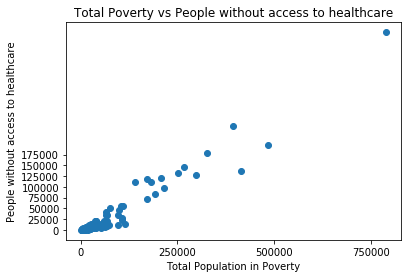

In [104]:
plt.scatter(mergepoverty['Total Population in Poverty'],mergepoverty['People without access to healthcare'])
plt.xlabel("Total Population in Poverty")
plt.ylabel("People without access to healthcare")
plt.title ("Total Poverty vs People without access to healthcare")
plt.xticks(np.arange(0, 800000, step = 250000))
plt.yticks(np.arange(0, 180000, step = 25000))
plt.show()

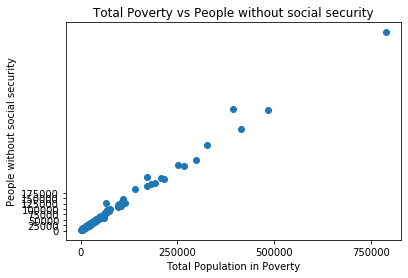

In [105]:
plt.scatter(mergepoverty['Total Population in Poverty'],mergepoverty['People without social security'])
plt.xlabel("Total Population in Poverty")
plt.ylabel("People without social security")
plt.title ("Total Poverty vs People without social security")
plt.xticks(np.arange(0, 800000, step = 250000))
plt.yticks(np.arange(0, 180000, step = 25000))
plt.show()